In [1]:
import pandas as pd
import numpy as np
import bilby
import pickle
import corner

import matplotlib.pyplot as plt

In [2]:
# General settings
import matplotlib as mpl
mpl.rc_file('/Users/ulyana/Documents/PhDThesisPlots/matplotlibrc')

In [3]:
my_color = '#4c7f7f'

In [6]:
red_cosmo_params = ['H0', 'mu_g', 'sigma_g']

In [4]:
red_cosmo_corner_lbs = ['$H_0$\n [km s$^{-1}$ Mpc$^{-1}$]',  
              '$\\mu_{\\rm g}$\n [$M_{\odot}$]', 
              '$\\sigma_{\\rm g}$\n [$M_{\odot}$]'
            ]
red_cosmo_title_labels = ['$H_0$', 
              '$\\mu_{\\rm g}$', 
              '$\\sigma_{\\rm g}$'
            ]

In [7]:
red_injected_values_vanilla = pd.DataFrame.from_dict({'H0':67.8*np.ones(1), 
                   'mu_g':35*np.ones(1),
                   'sigma_g':3.9*np.ones(1)
                })
red_injected_values_redshift = pd.DataFrame.from_dict({'H0':173.28*np.ones(1), 
                   'mu_g':40.9*np.ones(1), 
                   'sigma_g':7.63*np.ones(1)
                })

In [8]:
# load dictionary of events for Vanilla case
case1_dictionary_path = 'data/case1_events_dictionary.pkl'
with open(case1_dictionary_path, 'rb') as f:
    case1_dict = pickle.load(f)

path_to_vanilla_pe = case1_dict['case1_inj_number']['case1_1e6inj_286ev']
vanilla_cosmo_pe = bilby.core.result.read_in_result(path_to_vanilla_pe).posterior
red_vanilla_cosmo_pe_sel = vanilla_cosmo_pe[red_cosmo_params]

# load dictionary of events for Redshift-Dependent case
case2_dictionary_path = 'data/case2_events_dictionary.pkl'
with open(case2_dictionary_path, 'rb') as f:
    case2_dict = pickle.load(f)

path_to_redshift_pe = case2_dict['case2_inj_number']['case2_1e6inj_80ev']
redshift_cosmo_pe = bilby.core.result.read_in_result(path_to_redshift_pe).posterior
red_redshift_cosmo_pe_sel = redshift_cosmo_pe[red_cosmo_params]

In [34]:
def plot_corner(data, injected_values, labels, title_labels, plot_name, lbl_size=21, figsize=(6, 6), **kwargs):
    figure = corner.corner(
        data, 
        truths=injected_values, 
        labels=labels, 
        titles=title_labels, 
        rect=[0, 0, 1, 1],
        figsize=figsize,
        **kwargs
    )
    
    # Adjust tick parameters for all axes
    for ax in figure.get_axes():
        ax.tick_params(axis='both', labelsize=lbl_size)
    
    # Force a tight layout by adjusting subplot spacing
    figure.subplots_adjust(wspace=0, hspace=0)
    plt.subplots_adjust(left=0.2, bottom=0.2, right=0.95, top=0.95)
   
    # Save the plot to a file
    plt.savefig(f'plots/{plot_name}.pdf')
    
    # Display the plot
    plt.show()
    

In [38]:
default_kwargs = dict(
            bins=50, smooth=0.9,
            smooth1d=0.8,
            show_titles=True,
            title_kwargs=dict(fontsize=21),
            title_fmt='.2f',
            title_quantiles=[0.16,0.5,0.84],
            color=my_color,
            label_kwargs = dict(color = 'black', fontsize = 28),
            truth_color='black', quantiles=[0.16, 0.84],
            levels=(1 - np.exp(-0.5), 1 - np.exp(-2), 1 - np.exp(-9 / 2.)),
            plot_density=False, plot_datapoints=True, fill_contours=True,
            max_n_ticks=3, labelpad=-0.02
)

### Vanilla case

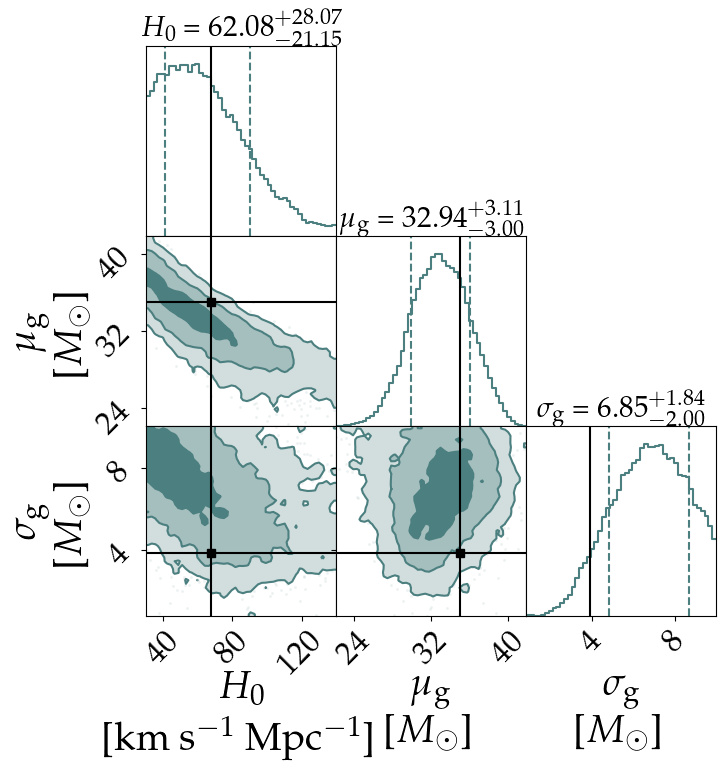

In [39]:
plot_corner(red_vanilla_cosmo_pe_sel, red_injected_values_vanilla.iloc[0].to_numpy(), 
            red_cosmo_corner_lbs, red_cosmo_title_labels, 'red_vanilla_cosmo_corner', 
            23, **default_kwargs)

### Redshift-Dependent case

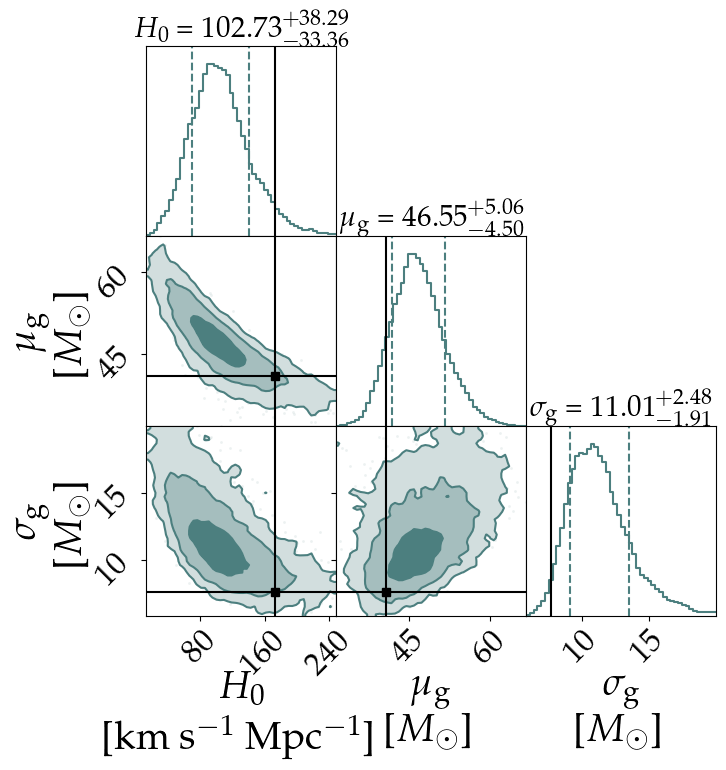

In [40]:
plot_corner(red_redshift_cosmo_pe_sel, red_injected_values_redshift.iloc[0].to_numpy(), 
            red_cosmo_corner_lbs, red_cosmo_title_labels, 'red_redshift_cosmo_corner', 
            23, **default_kwargs)